<a href="https://colab.research.google.com/github/aleylani/Python/blob/main/exercises/10_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b)

<img src="../assets/numpy_1b.png" width = 300>

</details>




3.5


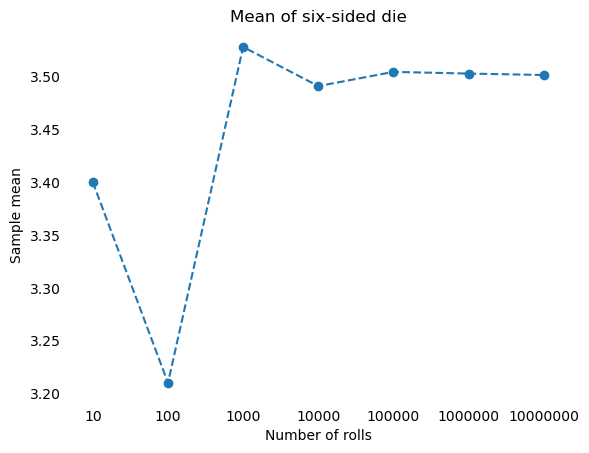

In [47]:
#a)
from turtle import color
import numpy as np 
import matplotlib.pyplot as plt 

dice = np.array(range(1,7))
print(dice.mean())

#b)
num_of_rolls = np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000])

means_of_dices = []

for rolls in num_of_rolls:
    sim_rolls = np.random.randint(1,7,rolls)

    mean_of_rolls = sim_rolls.mean()
    means_of_dices.append(mean_of_rolls)

means_of_dices = np.array(means_of_dices)

plt.plot(num_of_rolls, means_of_dices, marker="o", ls="dashed")
plt.box(False)
plt.xscale('log')  # Använd logaritmisk skala för x-axeln
plt.xticks(num_of_rolls, labels=num_of_rolls)  # Ställ in exakta ticks på x-axeln
plt.tick_params(axis='both', which='both', bottom=False, left=False)
plt.xlabel("Number of rolls")
plt.ylabel("Sample mean")
plt.title("Mean of six-sided die")
plt.show()

---
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a)

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a)

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b)

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count:
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d)


<img src="../assets/numpy2d.png" width = 300>


e)

<img src="../assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

Sample space for two dice sums: 
 [[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
Unique values: [ 2  3  4  5  6  7  8  9 10 11 12]
Counts: [1 2 3 4 5 6 5 4 3 2 1]
Frequencies:  [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]
Sum of frequencies:  1.0


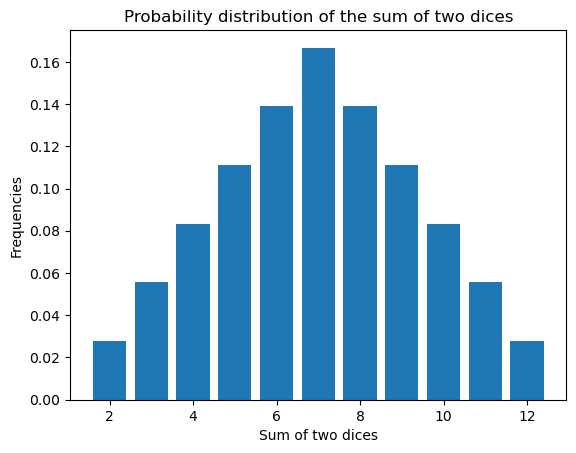

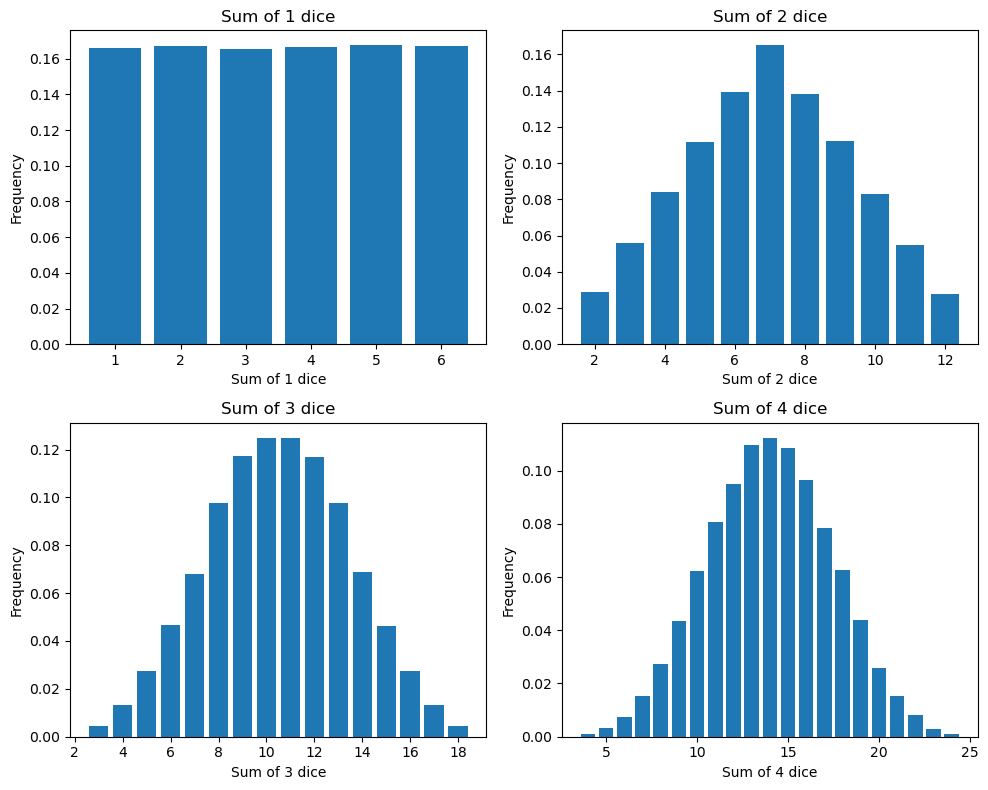

In [56]:
import numpy as np
import matplotlib.pyplot as plt

#a)
die = np.arange(1,7)
space_sum = np.add.outer(die,die)
print(f"Sample space for two dice sums: \n {space_sum}")

#b)
unique_value, counts = np.unique(space_sum, return_counts=True)
print(f"Unique values: {unique_value}")
print(f"Counts: {counts}")

#c)
frequencies = counts/counts.sum()m
print(f"Frequencies:  {frequencies}")
print(f"Sum of frequencies:  {frequencies.sum()}")

#b)
plt.bar(unique_value, frequencies)
plt.xlabel("Sum of two dices")
plt.ylabel("Frequencies")
plt.title("Probability distribution of the sum of two dices")
plt.show()

#e)
fig, axs= plt.subplots(2,2, figsize=(10,8))

for num_dice, ax in zip(range(1,5), axs.flatten()):
    sums = np.sum(np.random.randint(1,7, size=(100000, num_dice)), axis=1)
    unique_value, counts = np.unique(sums, return_counts=True)
    frequencies = counts / counts.sum()

    ax.bar(unique_value, frequencies)
    ax.set_xlabel(f"Sum of {num_dice} dice")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Sum of {num_dice} dice")

plt.tight_layout()
plt.show()